In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
from faker import Faker
from mysql import connector as cn
import datetime as datetime

In [2]:
# instantiating faker
fk= Faker()

In [3]:
# defining the number of row the dataset should have
rows=3000

In [4]:
# making sure the data is reproducible
Faker.seed(452)
# ceating an empty list of my table books
books=[]
# iterrating in each row get the entries
for row in range(rows):
    # creating dictionary for column book
    book={'bookid': row,
           'author':fk.name(),
           'title':fk.sentence(),
           'published':fk.year(),
           'barcode':fk.ean(length=8) }
    # appending into empty list 'books'
    books.append(book)

In [5]:
# creating an empty list called patron
patrons= []
#iterrating in reach row to get the entries
for row in range(rows):
    # creating a dictionary for the table patron
    patron={'patronid':row, 
           'first_name':fk.first_name(),
           'last_name':fk.last_name(),
           'email':fk.email()}
    patrons.append(patron)

In [6]:
# creating an empty list, loan
loans= []
#iterrating in each row to get the entries
for row in range(rows):
    # creating a dictionary 
    loan={'loanid':row,
         'bookid':row,
         'patronid':row,
         'loandate':fk.date_this_decade(),
         'duedate':fk.date_this_decade(),
         'returndate':fk.date_this_decade()}
    loans.append(loan)

In [7]:
# converting all datasets into dataframes
books=pd.DataFrame(books).set_index('bookid')
books.head()

,author,title,published,barcode
bookid,,,,
0,Matthew Newton,Become because woman your mind successful.,1998,97097242
1,Regina Small,Including society enter similar religious wear.,2010,54511903
2,Grace Moore,Either game inside range.,2000,06626242
3,Laura Sharp,History where senior.,2017,92932463
4,Amanda Salazar,Understand draw behavior woman.,1994,76678868


In [8]:
patrons=pd.DataFrame(patrons).set_index('patronid')
patrons.head()

,first_name,last_name,email
patronid,,,
0,Stephanie,Blanchard,jhowell@example.net
1,Anthony,Le,evan67@example.com
2,Sara,Evans,jill31@example.com
3,Karen,Graves,cherylmcdaniel@example.org
4,Nathan,Roach,lisa08@example.org


In [9]:
loans = pd.DataFrame(loans).set_index('loanid')
loans.head()

,bookid,patronid,loandate,duedate,returndate
loanid,,,,,
0,0,0,2022-01-11,2021-11-16,2022-06-02
1,1,1,2023-09-27,2020-02-23,2022-08-27
2,2,2,2022-09-26,2022-02-28,2023-01-04
3,3,3,2021-02-25,2020-01-30,2022-07-20
4,4,4,2020-10-03,2021-07-09,2020-07-27


In [10]:
loans['duedate']= pd.to_datetime(loans.duedate)
loans['returndate']=pd.to_datetime(loans.returndate)
loans['loandate']=pd.to_datetime(loans.loandate)

In [11]:
loans.head()

,bookid,patronid,loandate,duedate,returndate
loanid,,,,,
0,0,0,2022-01-11,2021-11-16,2022-06-02
1,1,1,2023-09-27,2020-02-23,2022-08-27
2,2,2,2022-09-26,2022-02-28,2023-01-04
3,3,3,2021-02-25,2020-01-30,2022-07-20
4,4,4,2020-10-03,2021-07-09,2020-07-27


In [12]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   bookid      3000 non-null   int64         
 1   patronid    3000 non-null   int64         
 2   loandate    3000 non-null   datetime64[ns]
 3   duedate     3000 non-null   datetime64[ns]
 4   returndate  3000 non-null   datetime64[ns]
dtypes: datetime64[ns](3), int64(2)
memory usage: 140.6 KB


In [13]:
# shuffling the bookid and the patronid
loans['bookid']=np.random.randint(1,3001,size=3000)
loans['patronid']=np.random.randint(1,3001,size=3000)

In [14]:
loans.head()

,bookid,patronid,loandate,duedate,returndate
loanid,,,,,
0,744,236,2022-01-11,2021-11-16,2022-06-02
1,1858,485,2023-09-27,2020-02-23,2022-08-27
2,312,1098,2022-09-26,2022-02-28,2023-01-04
3,2270,2581,2021-02-25,2020-01-30,2022-07-20
4,1461,1354,2020-10-03,2021-07-09,2020-07-27


In [15]:
# adding 15 days to all the loandate to recreate a duedate
loans['duedate']= loans['loandate']+ pd.Timedelta(days=5)

In [16]:
# recreating returndate, with the returndate randomised
loans['returndate']= loans['loandate'].apply(lambda x:x + pd.Timedelta(np.random.randint(20,40)))

In [17]:
mask=np.random.choice([True, False],size=loans.shape[0],p=[.8,.2])
loans['returndate']=loans.loc[mask, 'returndate']

In [18]:
loans.sample(10)

,bookid,patronid,loandate,duedate,returndate
loanid,,,,,
2931,662,2373,2022-04-14,2022-04-19,2022-04-14 00:00:00.000000037
2265,2237,315,2021-01-01,2021-01-06,2021-01-01 00:00:00.000000021
1512,2581,161,2020-11-22,2020-11-27,2020-11-22 00:00:00.000000034
1744,530,2227,2021-09-28,2021-10-03,2021-09-28 00:00:00.000000033
113,2617,378,2021-01-15,2021-01-20,2021-01-15 00:00:00.000000024
2497,1179,1819,2021-08-07,2021-08-12,2021-08-07 00:00:00.000000035
482,307,1698,2021-12-13,2021-12-18,2021-12-13 00:00:00.000000025
2037,1124,2356,2023-07-23,2023-07-28,2023-07-23 00:00:00.000000039
2465,2028,2178,2023-07-24,2023-07-29,2023-07-24 00:00:00.000000028


In [19]:
# retrieving the value of the environment 'username' and 'password'
db_user=os.environ.get('username')
db_password=os.environ.get('password')

In [20]:
# setting up connection to be database
connection= cn.connect(
                      host='localhost',
                      user='root',
                      password='schrodinger',database='library')

In [21]:
# creating a cursor object that will write queries to the database
cur= connection.cursor()

In [22]:
# dropping any database with the same name to what i am creating
cur.execute('DROP DATABASE IF EXISTS library')

In [23]:
# creating database
cur.execute('CREATE DATABASE library')

In [24]:
# activate the use database
cur.execute('USE library')

In [25]:
# declaring a syntax that holds the tables
query="""
CREATE TABLE IF NOT EXISTS books(bookid INT auto_increment PRIMARY KEY,
author VARCHAR(250) NOT NULL,
title VARCHAR(250) NOT NULL,
published INT NOT NULL,
barcode VARCHAR(250) NOT NULL
);


"""

In [26]:
query1="""
CREATE TABLE IF NOT EXISTS patrons(patronid INT auto_increment PRIMARY KEY,
first_name VARCHAR(250) NOT NULL,
last_name VARCHAR(250) NOT NULL,
email VARCHAR(250) NOT NULL
);


"""

In [27]:
query2="""
CREATE TABLE IF NOT EXISTS loans(loanid INT auto_increment PRIMARY KEY,
bookid INT NOT NULL,
patronid INT NOT NULL,
loandate DATE NOT NULL,
duedate DATE NOT NULL,
returndate DATE,
FOREIGN KEY(bookid) REFERENCES books(bookid),
FOREIGN KEY (patronid) REFERENCES patrons(patronid)
);


"""

In [28]:
# passing the query
cur.execute(query)

In [29]:
cur.execute(query1)

In [30]:
cur.execute(query2)

In [31]:
# creating an insert statement to insert tablename and values in the respective tables
def insert_statement_generator(df,tablename):
    for index, row in df.iterrows():
        values=[]
        for value in row:
            if pd.isna(value):
                value='NULL'
            else:
                value= f'"{value}"'
            values.append(value)
        column_name = ",".join(df.columns)
        change_value= ",".join(f"{val}" for val in values)
        insert_statement= f"INSERT INTO {tablename} ({column_name}) VALUES ({change_value})"
        yield insert_statement     

In [32]:
bk=list(insert_statement_generator(books, 'books'))
pt=list(insert_statement_generator(patrons, 'patrons'))
ll=list(insert_statement_generator(loans, 'loans'))

In [33]:
connection.commit()

In [34]:
for statement in bk:
    cur.execute(statement)

In [35]:
for statement in pt:
    cur.execute(statement)

In [36]:
for statement in ll:
    cur.execute(statement)

In [37]:
# Saving all your have done it to take effect in the database
connection.commit()

* What are the most popular books based on the number of loans?
* What are the books that have been published in a specific year?
* What are the books with a specific author?
* What is the average loan duration for a book?
* What are the most popular books based on the number of loans?
* How many books have been returned late?
* What is the average number of books loaned by each patron?
* Who are the patrons who have taken the most number of loans?
* What is the distribution of patrons based on their email domain?

In [38]:
# What are the most popular books based on the number of loans
query3 = """
SELECT title, COUNT(*) as loan_count
FROM books
JOIN loans 
ON books.bookid = loans.bookid
GROUP BY title
ORDER BY loan_count DESC
LIMIT 5;
"""

* 1. What are the most popular books based on the number of loans?

In [39]:
ques1= pd.read_sql(query3, connection)

/var/folders/pn/727r1z554zz3k1s6xns85tpr0000gn/T/ipykernel_99411/684267711.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ques1= pd.read_sql(query3, connection)


In [40]:
ques1

,title,loan_count
0,Decide tend happy think.,6
1,Person put to capital simple leg give.,6
2,Myself represent catch answer.,5
3,Far put pressure.,5
4,Throw price plan political seek.,5


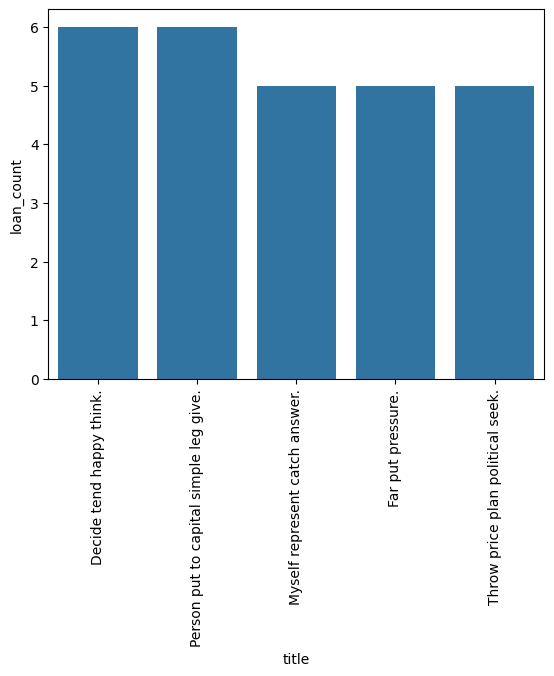

In [41]:
sns.barplot(data=ques1, x= 'title', y= 'loan_count');
plt.xticks(rotation=90);

* 2. What are the books that have been published in each year?

In [42]:
query4 = """
SELECT published, COUNT(*) AS book_count
FROM books
GROUP BY published
ORDER BY book_count DESC
LIMIT 10;
"""

In [43]:
ques2= pd.read_sql(query4, connection)

/var/folders/pn/727r1z554zz3k1s6xns85tpr0000gn/T/ipykernel_99411/2235888147.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ques2= pd.read_sql(query4, connection)


In [44]:
ques2

,published,book_count
0,1983,75
1,1992,70
2,1990,68
3,1998,67
4,2008,67
5,2016,66
6,1972,66
7,2023,62
8,1977,62
9,1976,62


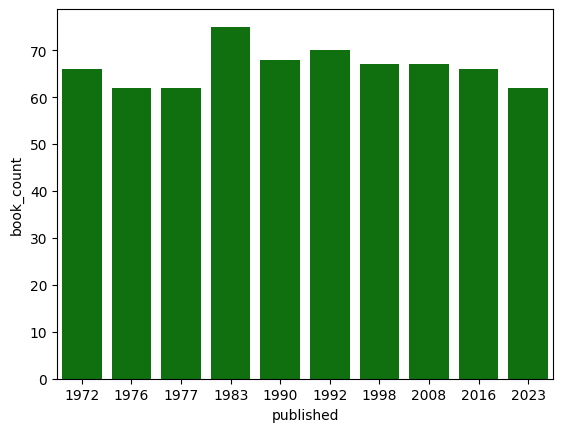

In [45]:
sns.barplot(data=ques2, x=ques2.published, y=ques2.book_count,color='g');

* 4. What are the books with a specific author?

In [46]:
query5=""" SELECT author, COUNT(*) AS book_count
FROM books
GROUP BY author
ORDER BY book_count DESC
LIMIT 10;

"""

In [47]:
ques4= pd.read_sql(query5, connection)

/var/folders/pn/727r1z554zz3k1s6xns85tpr0000gn/T/ipykernel_99411/3270129308.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ques4= pd.read_sql(query5, connection)


In [48]:
ques4

,author,book_count
0,Sarah Phillips,3
1,Ashley Smith,3
2,Kimberly Jackson,3
3,John Lewis,3
4,Brenda Miller,2
5,Victoria Todd,2
6,Michael Rodriguez,2
7,Jeffrey Lee,2
8,Michael Jacobs,2
9,Jennifer Garcia,2


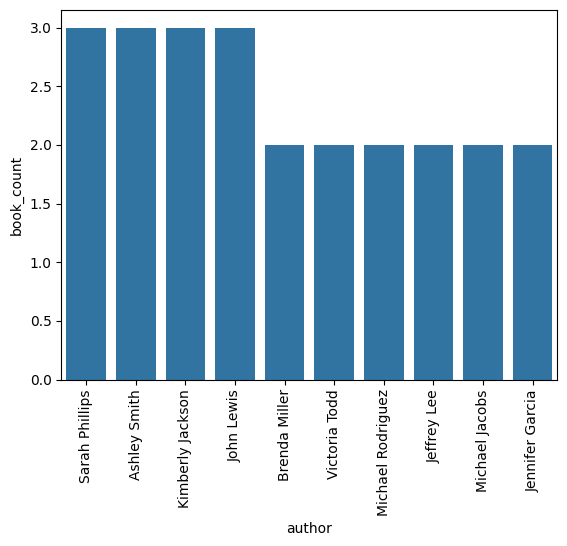

In [49]:
sns.barplot(ques4, x= ques4.author, y=ques4.book_count)
plt.xticks(rotation=90);

* 5. What is the average loan duration for a book?

In [50]:
loans.head()

,bookid,patronid,loandate,duedate,returndate
loanid,,,,,
0,744,236,2022-01-11,2022-01-16,2022-01-11 00:00:00.000000020
1,1858,485,2023-09-27,2023-10-02,2023-09-27 00:00:00.000000031
2,312,1098,2022-09-26,2022-10-01,2022-09-26 00:00:00.000000026
3,2270,2581,2021-02-25,2021-03-02,NaT
4,1461,1354,2020-10-03,2020-10-08,2020-10-03 00:00:00.000000027


In [51]:
query6="""SELECT AVG(DATEDIFF(loandate,duedate)) AS average_loan_duaration
FROM loans;
"""

In [52]:
ques5= pd.read_sql(query6, connection)

/var/folders/pn/727r1z554zz3k1s6xns85tpr0000gn/T/ipykernel_99411/3006072809.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ques5= pd.read_sql(query6, connection)


In [53]:
ques5

,average_loan_duaration
0,-5.0


* 6. What are the most popular books based on the number of loans?

In [54]:
loans.head()

,bookid,patronid,loandate,duedate,returndate
loanid,,,,,
0,744,236,2022-01-11,2022-01-16,2022-01-11 00:00:00.000000020
1,1858,485,2023-09-27,2023-10-02,2023-09-27 00:00:00.000000031
2,312,1098,2022-09-26,2022-10-01,2022-09-26 00:00:00.000000026
3,2270,2581,2021-02-25,2021-03-02,NaT
4,1461,1354,2020-10-03,2020-10-08,2020-10-03 00:00:00.000000027


In [55]:
query7="""SELECT bookid, COUNT(*) AS loan_count
FROM loans
GROUP BY bookid
ORDER BY loan_count DESC
LIMIT 10;
"""

In [56]:
ques6= pd.read_sql(query7,connection)

/var/folders/pn/727r1z554zz3k1s6xns85tpr0000gn/T/ipykernel_99411/4055592419.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ques6= pd.read_sql(query7,connection)


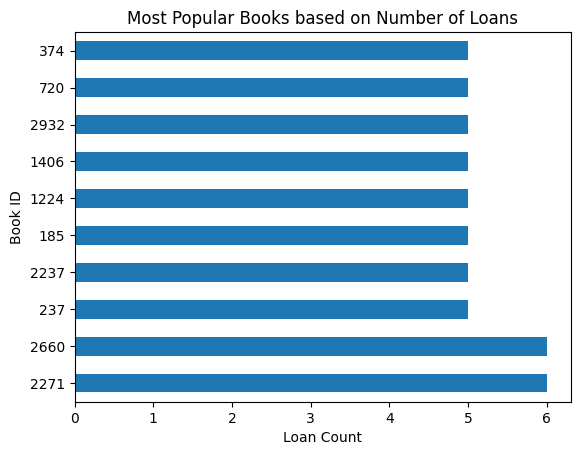

In [57]:
ques6.plot(kind='barh', x='bookid', y='loan_count', legend=False)
plt.xlabel('Loan Count')
plt.ylabel('Book ID')
plt.title('Most Popular Books based on Number of Loans')
plt.show()

* 7. How many books have been returned late?

In [58]:
query8= """SELECT COUNT(*) AS return_count
FROM loans
WHERE returndate > duedate;
"""

In [59]:
ques7= pd.read_sql(query8,connection)

/var/folders/pn/727r1z554zz3k1s6xns85tpr0000gn/T/ipykernel_99411/3408842439.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ques7= pd.read_sql(query8,connection)


In [60]:
ques7

,return_count
0,0


* 8. What is the average number of books loaned by each patron?

In [61]:
query9 = """
SELECT patronid, AVG(book_count) AS average_books_loaned
FROM (
    SELECT patronid, COUNT(bookid) AS book_count
    FROM loans
    GROUP BY patronid, bookid
) AS patron_books
GROUP BY patronid
ORDER BY average_books_loaned DESC;

"""


In [62]:
ques8= pd.read_sql(query9, connection)

/var/folders/pn/727r1z554zz3k1s6xns85tpr0000gn/T/ipykernel_99411/1532807237.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ques8= pd.read_sql(query9, connection)


In [63]:
ques8.head()

,patronid,average_books_loaned
0,831,1.0
1,971,1.0
2,840,1.0
3,1606,1.0
4,158,1.0


* 9. Who are the patrons who have taken the most number of loans?

In [64]:
query10= """
SELECT patronid, COUNT(bookid) AS num_loans
FROM loans
GROUP BY patronid
ORDER BY num_loans DESC
LIMIT 10;
"""


In [65]:
ques9= pd.read_sql(query10,connection)

/var/folders/pn/727r1z554zz3k1s6xns85tpr0000gn/T/ipykernel_99411/143639905.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ques9= pd.read_sql(query10,connection)


In [66]:
ques9

,patronid,num_loans
0,2374,5
1,449,5
2,869,5
3,102,5
4,400,5
5,1296,5
6,1530,5
7,180,5
8,476,5
9,1312,5


* 10. What is the distribution of patrons based on their email domain?

In [67]:
query11= """
SELECT SUBSTRING_INDEX(email, '@', -1) AS email_domain, COUNT(patronid) AS num_patrons
FROM patrons
GROUP BY email_domain
ORDER BY num_patrons DESC;
"""


In [68]:
ques10= pd.read_sql(query11,connection)

/var/folders/pn/727r1z554zz3k1s6xns85tpr0000gn/T/ipykernel_99411/555148441.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ques10= pd.read_sql(query11,connection)


In [69]:
ques10

,email_domain,num_patrons
0,example.org,1011
1,example.com,1008
2,example.net,981


In [70]:
#pip install pandoc